# <font color='blue'><font size=11><u>Lending Club Case Study</u></font>
##  <u>Objective</u> 
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to perform <b>Exploratory Data Analysis</b> and identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## <u>Importing Libraries</u>
Importing the necessary packages like pandas for working with dataframes, numpy for working with multidimensional arrays and matplotlib & seaborn for plotting graphs and warnings to filter out unnecessary warnings thrown while plotting seaborn graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <u>Quick Overview and Summary</u>
Loading the csv into a dataframe and taking a quick glance at first few rows and checking its summary stats

In [2]:
#importing the loan.csv file and creating a dataframe out of it
df=pd.read_csv('G:/UpGrad/Academics/EDA Lending Club Case Study/loan.csv')

In [3]:
#quick glimpse of the first 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Shape is (39717,111) and there are 74+13=87 numerical columns and remaining 24 non-numerical columns. Let us now check the summary statistics of those 87 numerical variables

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## <u>Data Cleaning</u>
Removing rows containing only NaNs, columns containing mostly NaNs and removing duplicates

In [7]:
#checking those columns having more than 90% NaNs
percent_NaN=100*(df.isnull().sum()/df.shape[0])
remove_cols=percent_NaN[percent_NaN>90]
remove_cols

mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl                       100.000000
inq_last_1

Using the .shape attribute we found out that there are 39717 rows and 111 columns. Now from the above .isnull method we can clearly see that there are columns containing few nulls and even worse there are columns containing mostly nulls, such columns are not of much use in performing analysis. Hence we're going to discard all those <u>mostly NaN columns</u> using the following .dropna method. We have to do that inplace.

In [8]:
df.drop(remove_cols.index, axis=1, inplace=True)

In [9]:
df.shape

(39717, 55)

From 111 columns we are now down to 55 columns after removing many columns which was containing at least 90% NaNs

In [10]:
#here we are checking if there are any rows which has only NaNs
(df.isnull().sum(axis=1)==df.shape[1]).sum()

0

Apparently there are no such rows. Hence we don't have to remove any rows for NaN reason

In [11]:
#checking if there are any duplicated rows
df.duplicated().sum()

0

Apparently there are no duplicates. We don't have to bother removing duplicates

In [12]:
#here we're removing all columns having single entry
for cols in df.columns:
    if df[cols].nunique()==1:
        df.drop(columns=cols,inplace=True)

There were 11 columns having only one entry which adds absolutely no value to our analysis. Hence we dropped those columns.

Now we're going to drop some of the <font color='red'>customer behavior variables</font>. Because when an applicant is approaching the lending club we don't have any customer behavior information about the applicant obviously because we don't know his behavior pattern as he's not a customer yet. Hence the following variables are not very useful for the EDA process <font color='red'>delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type</font>

In [13]:
cust_behavior=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','mths_since_last_delinq']
df.drop(columns=cust_behavior, inplace=True)

In [14]:
#dropping url as it will have no impact of loan repayment
df.drop(columns='url',inplace=True)

In [15]:
#once again we're taking a quick glance at the modified dataframe after removing many NaN columns
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,11-Dec,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,11-Dec,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,11-Dec,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,11-Dec,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,11-Dec,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

## <u>Identifying the Target Variable</u>
### Here the target variable is <font color='blue'>loan_Status</font>
The objective of this case study is to determine the main driving variables for the non-repayment of the loan which causes financial loss. Hence this particular variable <font color='blue'>'loan_status' </font> is the target variable. We're not particularly interested in the ongoing loans, hence we'll remove them. So we primarily have two values <font color='green'> 'Fully Paid' </font> and <font color='red'> 'Charged Off' </font>

In [17]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## <u>Data Wrangling</u>
Here we are going to remove the current loans and also change the data types of few columns to make it more suitable for numerical analysis

In [18]:
#removing the rows having loan_status as 'Current'
df=df[~(df.loan_status=='Current')]
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [19]:
#pulling out object dtype columns to see which columns require transformation
df.select_dtypes(object).head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,11-Dec,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,11-Dec,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,11-Dec,Fully Paid,NaN,small_business,real estate business,606xx,IL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,11-Dec,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA
5,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,11-Dec,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ


We clearly see that the columns such as <font color='green'>term, int_rate, emp_length</font> must be converted to <font color='green'>float type</font>. Also we need to convert <font color='red'>issue_d</font> from object type to <font color='red'>date type</font>. In the <font color='blue'>loan_status</font>, it will be convenient to map <font color='blue'>'Fully Paid' to 0</font> and <font color='blue'>'Charged Off' to 1</font>. We're going to apply basic <u>regex</u> in order to make these transformations. We're going to apply these transformations only on the aforementioned columns (not on the entire dataframe) to avoid disturbing other columns.

In [20]:
#first removing the unwanted character from the string, then casting the string object as float
df['term']=df['term'].replace('[(<)a-zA-Z(%+)-]','',regex=True).astype(float)
df['int_rate']=df['int_rate'].replace('[(<)a-zA-Z(%+)-]','',regex=True).astype(float)
df['emp_length']=df['emp_length'].replace('[(<)a-zA-Z(%+)-]','',regex=True).astype(float)

In [21]:
#here we're renaming the above 4 columns that we subjected to transformation
rename={'term':'term_months','int_rate':'int_rate_%','emp_length':'emp_length_years'}
df.rename(rename, axis=1, inplace=True)

In [22]:
def dateformat(x):
    d=x.split('-')
    year=str(int(d[0])+2000)
    '''
    since we know that our data set contains years from 2007 to 2011, 
    without adding 2000, pandas DatetimeIndex will throw out of bounds error
    '''
    month=d[1]
    return year+'-'+month

In [23]:
df.issue_d=df.issue_d.apply(dateformat)
df['issue_d']=pd.DatetimeIndex(df['issue_d'])

Note that the above transformation will add default date as 1st for every year-month 

In [24]:
'''
There are only 2 values in loan_status columns 'Fully Paid' and 'Charged Off'. 
We're mapping them to 0s and 1s respectivley
'''
df.loan_status=df.loan_status.apply(lambda x: 0 if x[0]=='F' else 1)

In [25]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_%,installment,grade,sub_grade,...,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,...,2011-12-01,0,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,...,2011-12-01,1,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,...,2011-12-01,0,NaN,small_business,real estate business,606xx,IL,8.72,0,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,...,2011-12-01,0,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,...,2011-12-01,0,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,0.0


## <u>Univariate and Bivariate Analysis</u>
In this segment we are going to perform univariate analysis, segmented univariate analysis, bivariate analysis and plot relevant graphs to understand the important driving factors for defaulting

In the above dataframe it looks like the variables such as <font color='green'>loan_amnt, funded_amnt, funded_amnt_inv</font> are almost equal everywhere, let us now statistically verify this claim.

In [26]:
print(f'On an average the funded_amnt differs from loan_amnt by {round(((100*(df.loan_amnt-df.funded_amnt)/df.loan_amnt)).mean(),2)} %')

On an average the funded_amnt differs from loan_amnt by 1.4 %


In [27]:
print(f'On an average the funded_amnt_inv differs from loan_amnt by {round(((100*(df.loan_amnt-df.funded_amnt_inv)/df.loan_amnt)).mean(),2)} %')

On an average the funded_amnt_inv differs from loan_amnt by 6.21 %


Since, both the variables <font color='red'>funded_amnt</font> and <font color='red'>funded_amnt_inv</font> deviate from <font color='green'>loan_amnt</font> only by a small margin. Let us drop both the variables and retain only the <font color='green'>loan_amnt</font>.

In [28]:
df.drop(columns=['funded_amnt','funded_amnt_inv'],inplace=True)

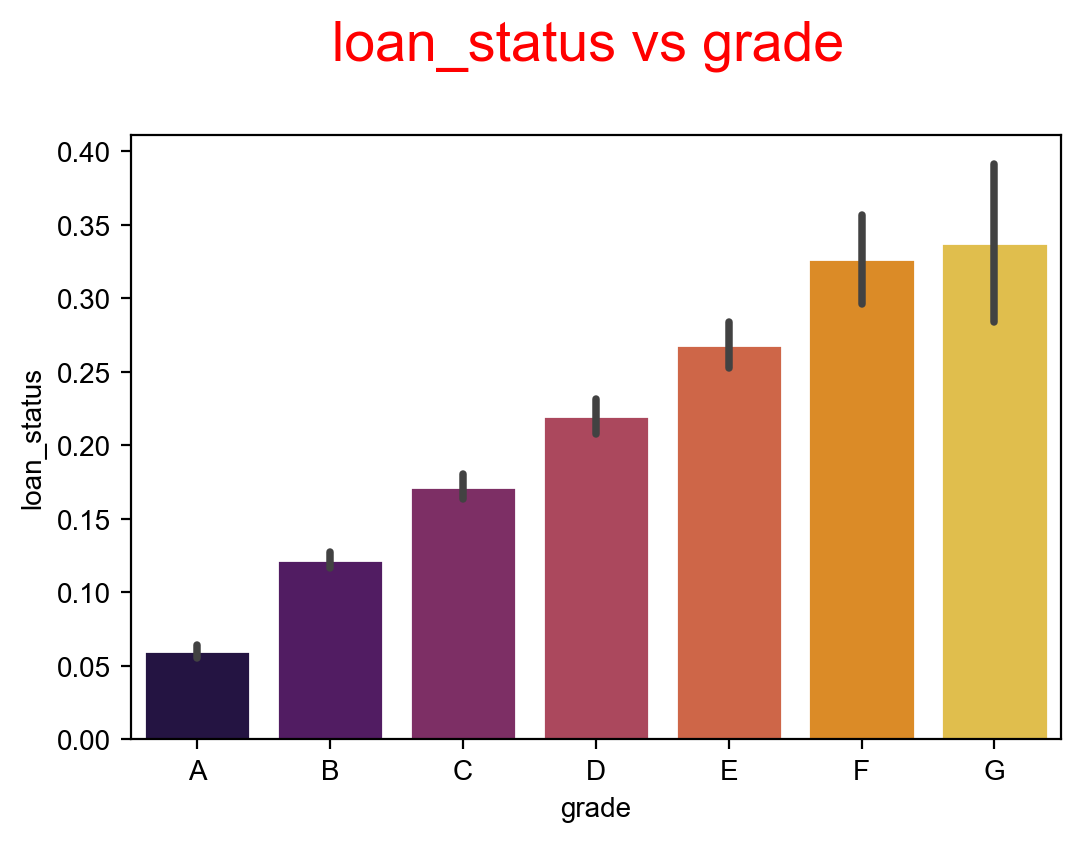

In [29]:
#here we're plotting bar graph for loan_status and grade
plt.figure(dpi=200)
plt.title('loan_status vs grade \n', fontdict={'fontsize':20,'color':'r'})
sns.set_style('darkgrid')
sns.barplot(x=df['grade'].sort_values(),y=df['loan_status'], palette='inferno')
plt.show()

In the above barplot we can see a good correlation between grade and loan_status. Loans belonging to grade D,E,F,G are considered to be high risk cases in increasing order. 

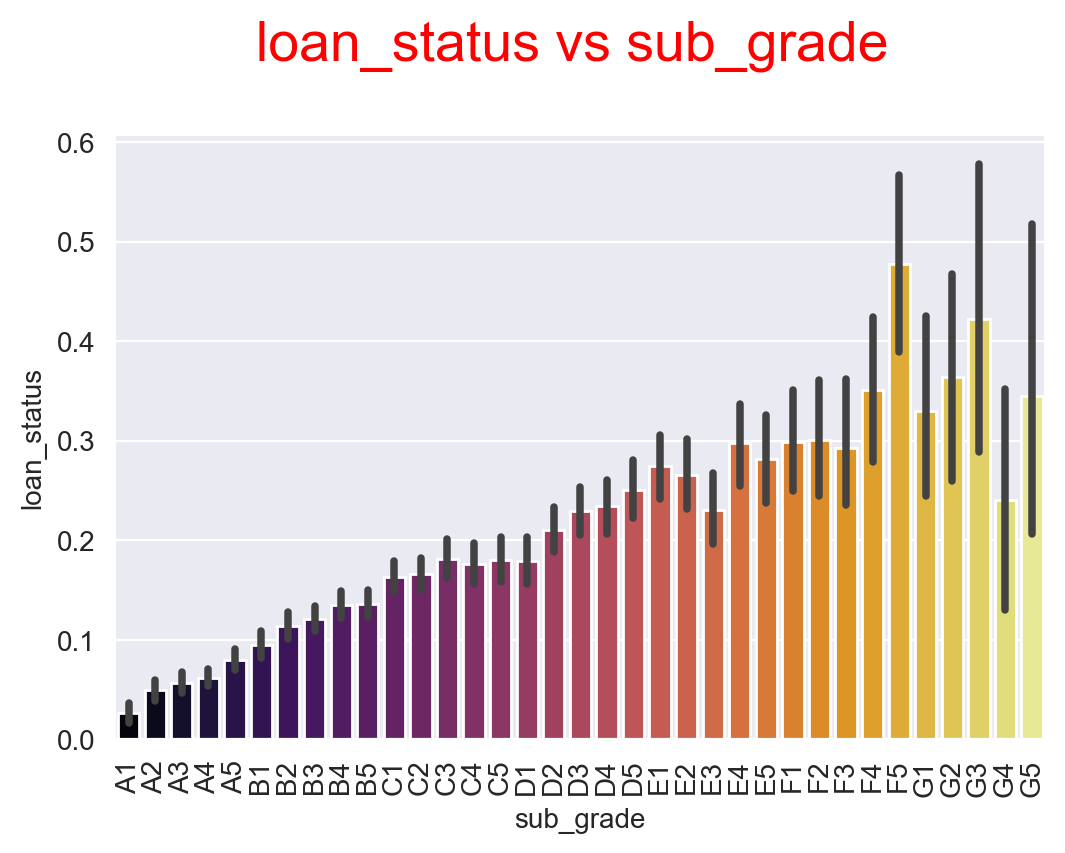

In [30]:
#here we're plotting bar graph for loan_status and sub_grade
plt.figure(dpi=200)
plt.title('loan_status vs sub_grade \n', fontdict={'fontsize':20,'color':'r'})
plt.xticks(rotation=90)
sns.barplot(x=df['sub_grade'].sort_values(),y=df['loan_status'], palette='inferno')
plt.show()

In the above barplot we can see a good correlation between sub_grade and loan_status. This is not particularly surprising because we've observed this positive trend between grades and loan_status as well

In [31]:
# bucketing annual_inc into categories
def loan_bucket(sal):
    if sal<5000:
        return 'very low'
    elif 5000<=sal and sal<10000:
        return 'low'
    elif 10000<=sal and sal<15000:
        return 'avg'
    elif 15000<=sal and sal<20000:
        return 'above avg'
    elif 20000<=sal and sal<25000:
        return 'high'
    return 'very high'
# vectorizing the above function
loan_bucket=np.vectorize(loan_bucket)

In [32]:
df.loan_amnt=df.loan_amnt.apply(loan_bucket)

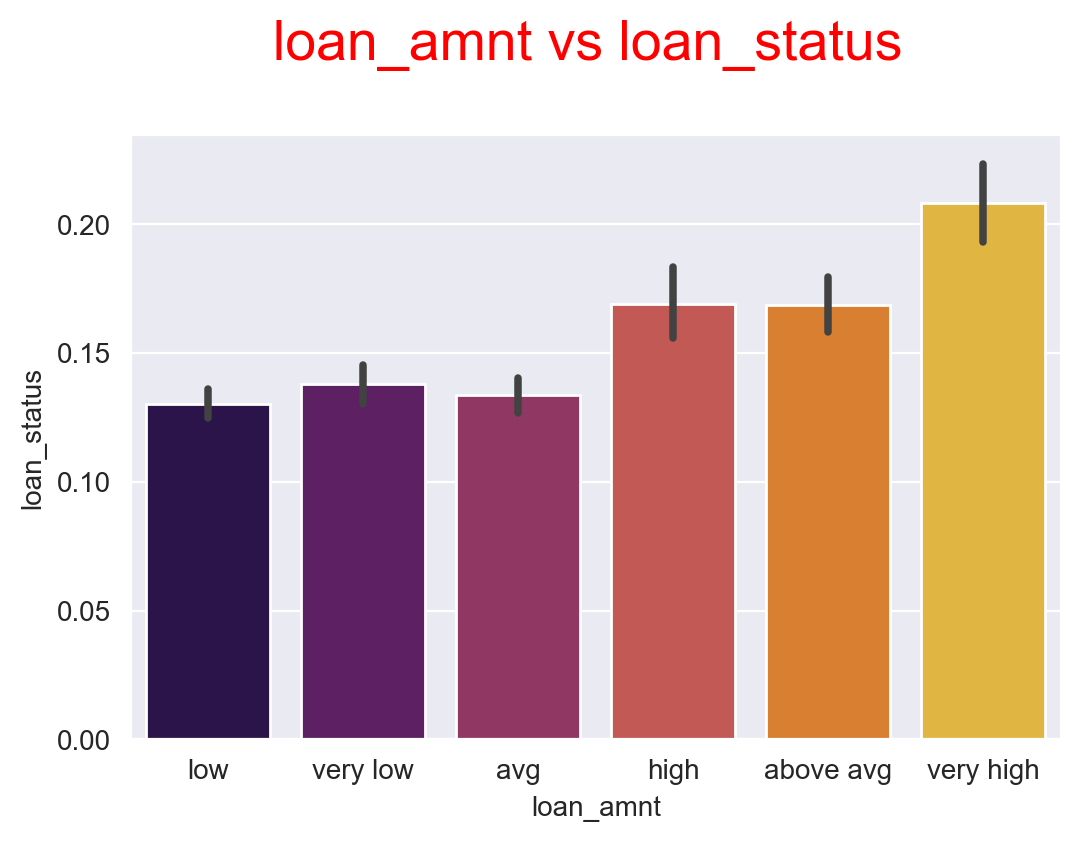

In [33]:
#here we are plotting bargraph for loan_status and loan_amnt
plt.figure(dpi=200)
plt.title('loan_amnt vs loan_status \n', fontdict={'fontsize':20,'color':'r'})
sns.barplot(x=df.loan_amnt,y=df['loan_status'], palette='inferno')
plt.show()

In the above barplot we can see that the loan_amnt has some influence on the loan_status. Higher the loan_amnt, higher the chances of defaulting

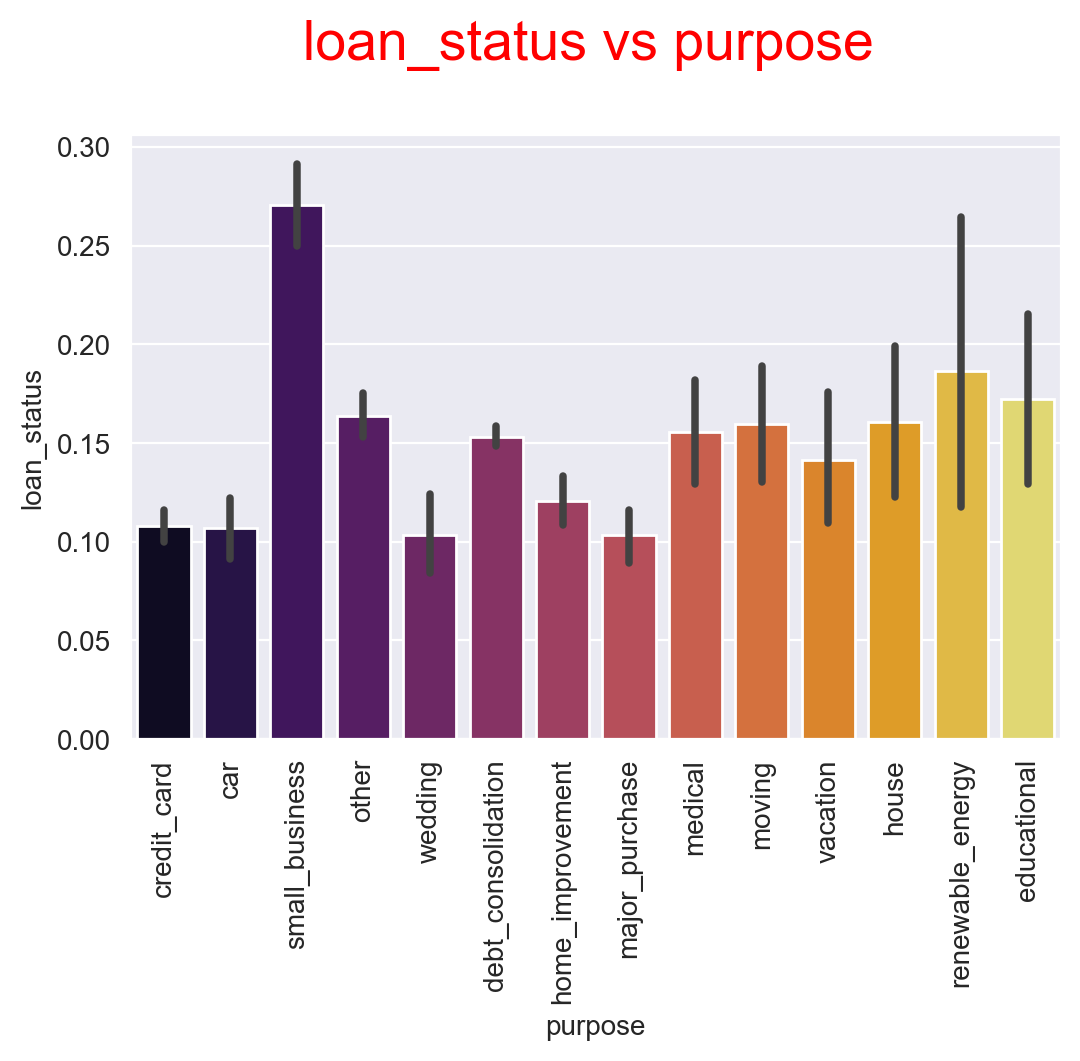

In [34]:
#here we are plotting bargraph for loan_status and purpose
plt.figure(dpi=200)
plt.title('loan_status vs purpose \n', fontdict={'fontsize':20,'color':'r'})
plt.xticks(rotation=90)
sns.barplot(x=df['purpose'],y=df['loan_status'], palette='inferno')
plt.show()

In the above barplot, except for small_business, all other categories vary between 10% and 15% default cases. Only small_business exhibit significantly higher chance of defaulting. But overall the purpose of loan does't seem to have much impact on repaying ability

In [35]:
#here let us see the income distribution of borrowers
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In the above statistical description we can clearly see that the highest annual income is 6 million, it is obvious that, it doesn't represent larger population. 

In [36]:
(df.annual_inc>=df.annual_inc.quantile(0.99)).sum()

386

In fact, we can see that only 386 persons are in the top 1% of population. We're going to ignore the top 1% (as they can skew the plot) and plotting the boxplot of annual_inc vs loan_status. <font color='red'>

In [37]:
df=df[df.annual_inc<df.annual_inc.quantile(0.99)]

In [38]:
# bucketing annual_inc into categories
def bucket(sal):
    if sal<50000:
        return 'low'
    elif 50000<=sal and sal<100000:
        return 'mid'
    elif 100000<=sal and sal<150000:
        return 'above avg'
    elif 150000<=sal and sal<200000:
        return 'high'
    else:
        return 'elite'
# vectorizing the above function
bucket=np.vectorize(bucket)

In [39]:
df.annual_inc=df.annual_inc.apply(bucket)

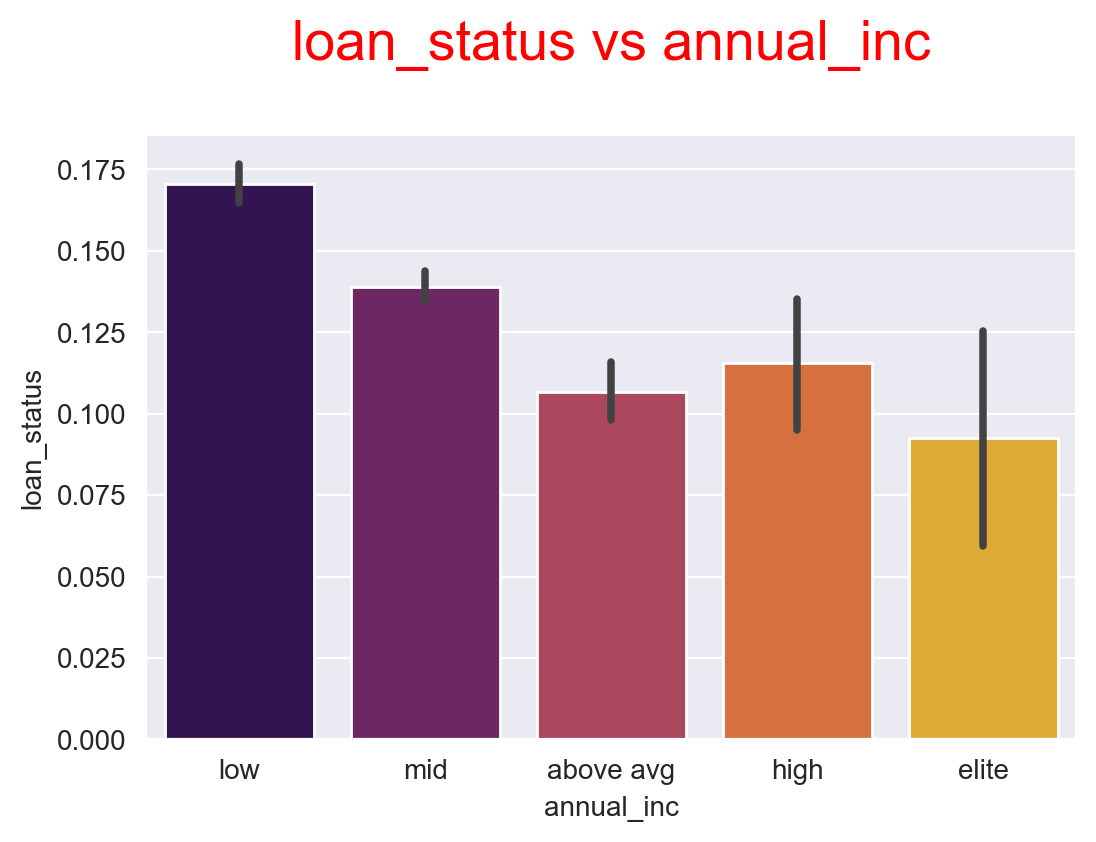

In [40]:
#here we are plotting barplot for annual_inc and loan_status
plt.figure(dpi=200)
plt.title('loan_status vs annual_inc\n', fontdict={'fontsize':20,'color':'r'})
sns.barplot(x=df.annual_inc,y=df['loan_status'], palette='inferno')
plt.show()

It is evident from the above bargraph that the people belonging to higher income bracket are more likely to pay off the loan fully

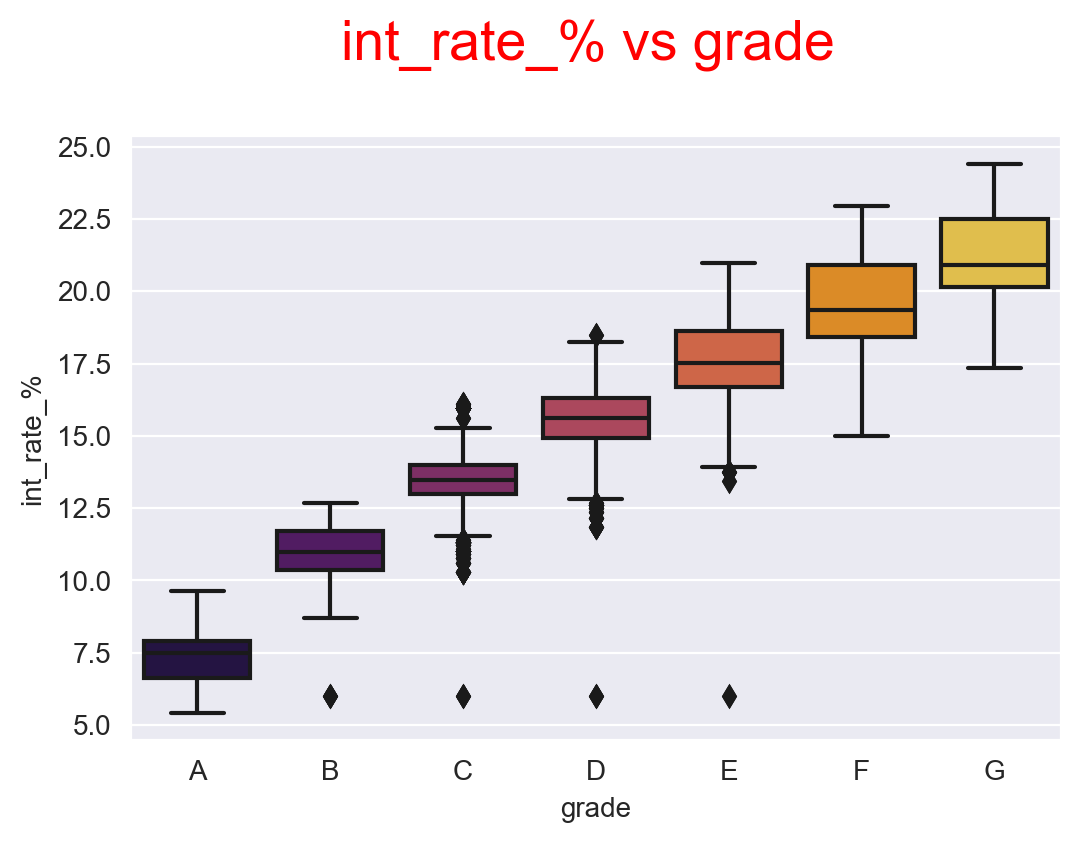

In [41]:
#here we are plotting boxplot for int_rate_% and grade
plt.figure(dpi=200)
plt.title('int_rate_% vs grade \n', fontdict={'fontsize':20,'color':'r'})
sns.boxplot(x=df.grade.sort_values(),y=df['int_rate_%'], palette='inferno')
plt.show()

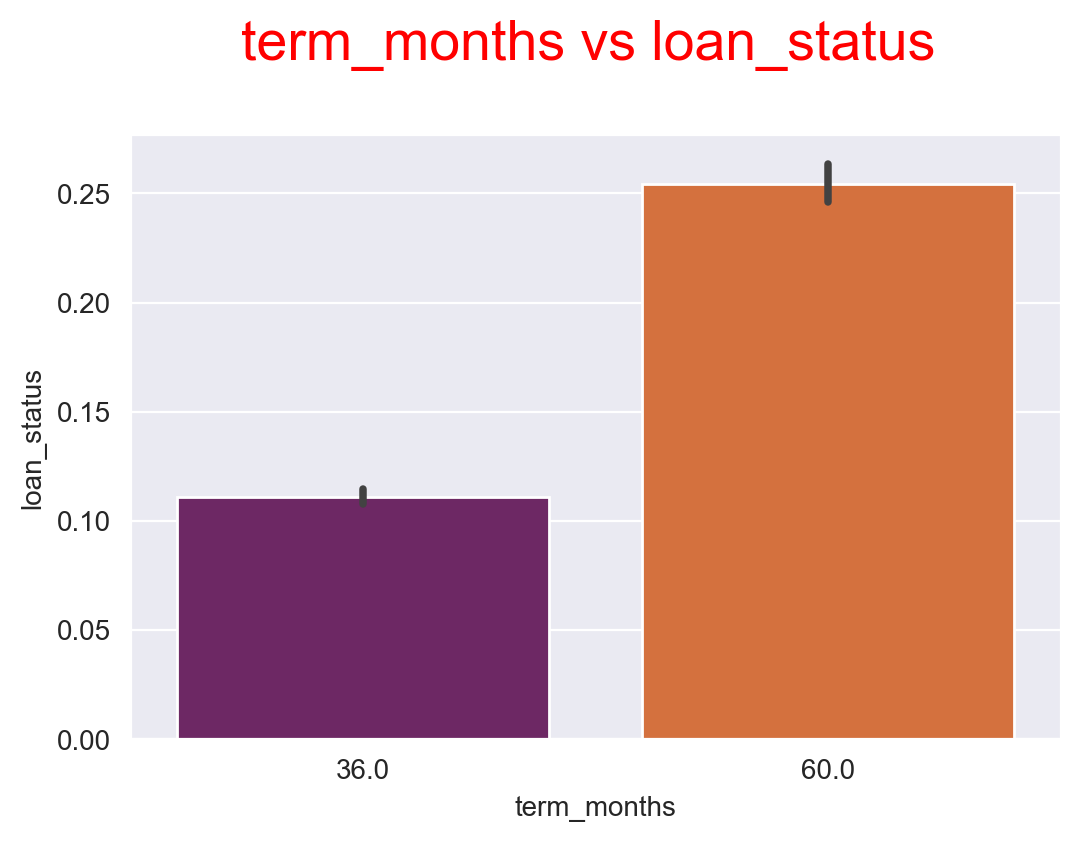

In [42]:
#here we are plotting barplot for term_months and loan_status
plt.figure(dpi=200)
plt.title('term_months vs loan_status \n', fontdict={'fontsize':20,'color':'r'})
sns.barplot(x=df.term_months,y=df.loan_status, palette='inferno')
plt.show()

From the above barplot, we clearly see that the people opting for 60 months tenure has higher likelihood of defaulting 

From the above table we clearly see positive linear correlation between grades and interest rate.
Now we're going to compute correlation matrix (Pearson correlation coefficient) in order to determine which two numeric variables are highly linearly correlated. While doing that let us also avoid columns containing NaNs, as it'll result in a row-full(or column-full) of NaNs in the correlation matrix

In [43]:
corr_table=df.dropna(axis=1).corr()
corr_table.dropna(how='all',inplace=True)
corr_table.dropna(how='all',axis=1,inplace=True)
corr_table

,id,member_id,term_months,int_rate_%,installment,loan_status,dti,pub_rec
id,1.000000,0.993531,0.175392,0.053055,0.074347,0.043289,0.091232,-0.017425
member_id,0.993531,1.000000,0.194003,0.049950,0.069268,0.040641,0.092419,-0.016797
term_months,0.175392,0.194003,1.000000,0.439061,0.091406,0.174404,0.077380,0.010159
int_rate_%,0.053055,0.049950,0.439061,1.000000,0.275178,0.212386,0.113470,0.100053
installment,0.074347,0.069268,0.091406,0.275178,1.000000,0.028811,0.061633,-0.044431
loan_status,0.043289,0.040641,0.174404,0.212386,0.028811,1.000000,0.044225,0.050640
dti,0.091232,0.092419,0.077380,0.113470,0.061633,0.044225,1.000000,-0.005539
pub_rec,-0.017425,-0.016797,0.010159,0.100053,-0.044431,0.050640,-0.005539,1.000000


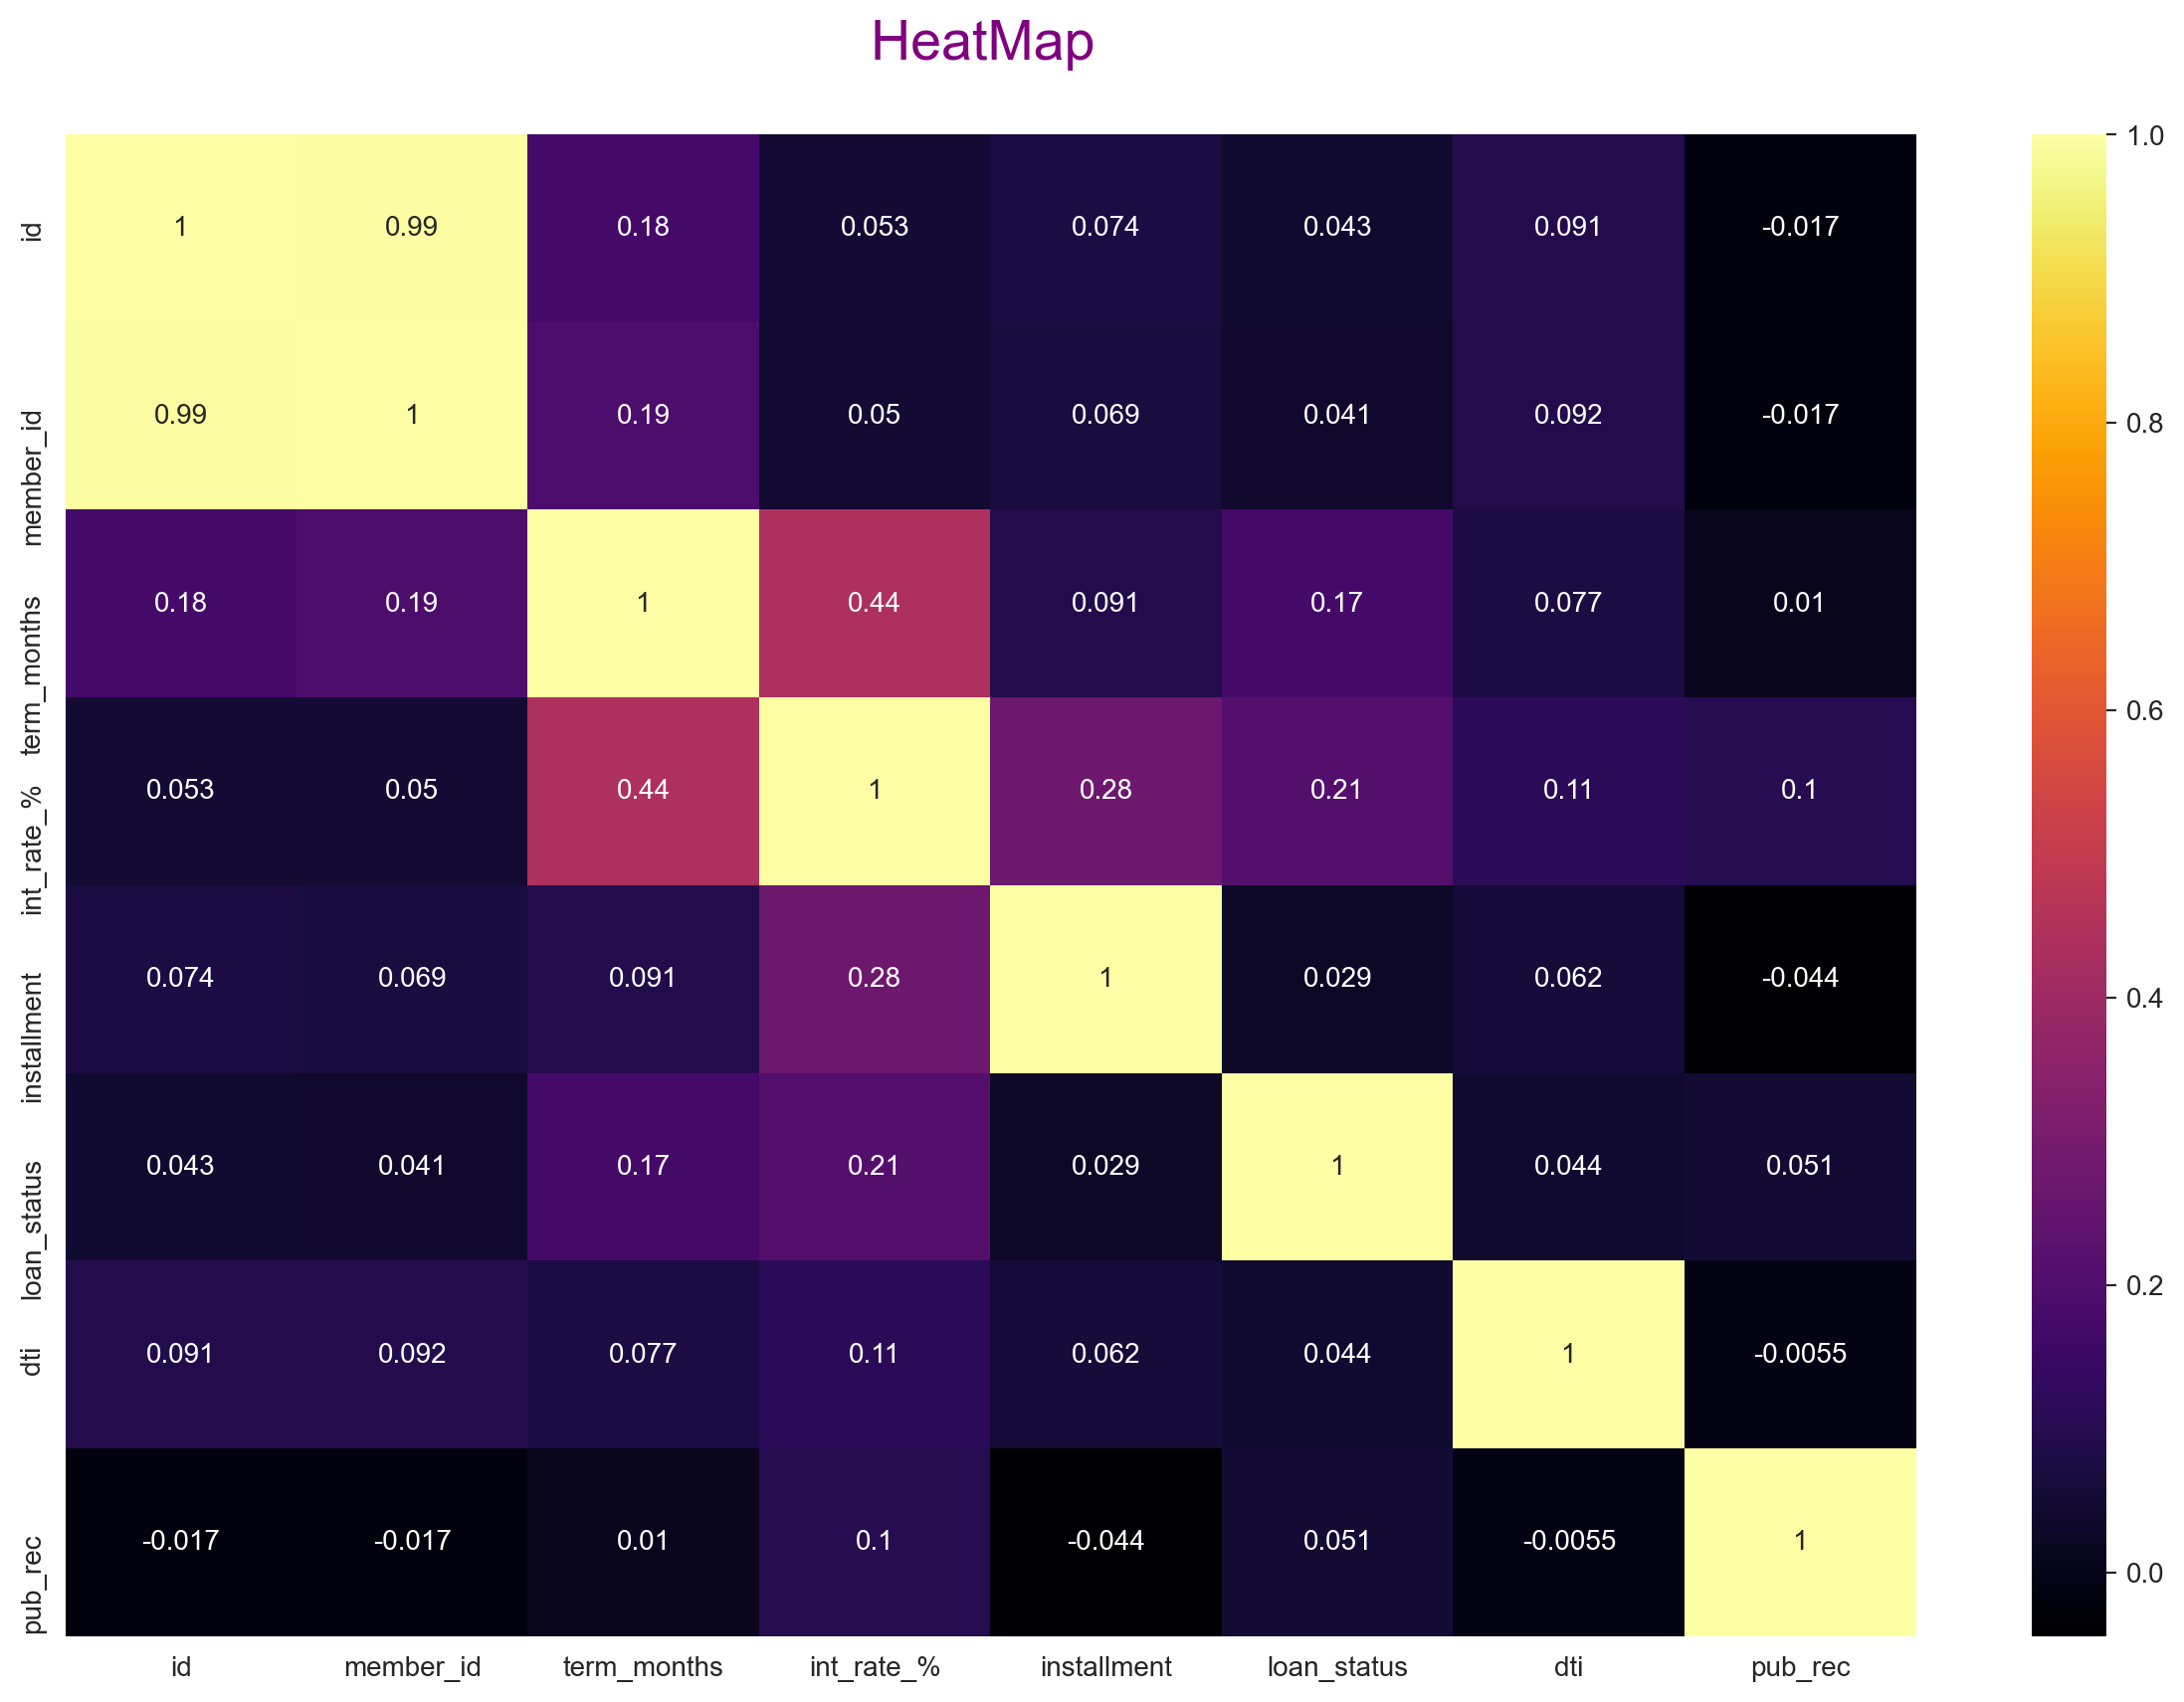

In [44]:
#here we are plotting heatmap to see linear correlation between pairs of variables
plt.figure(figsize=[15,10], dpi=200)
plt.title('HeatMap \n', fontdict={'fontsize':20,'color':'purple'})
sns.heatmap(corr_table,cmap='inferno', annot=True)
plt.show()

In the above heatmap of the correlation matrix, the only non-trivial linear correlation that we can find is between <font color='blue'>installment</font> and <font color='blue'>loan_amnt</font>, but they both don't have any correlation with the target variable <font color='green'>loan_status</font>. Particularly if we check the row(or column) corresponding to <font color='green'>loan_status</font>, we don't observe any 'strong' positive or negative linear correlation between <font color='green'>loan_status</font> and most other numerical variable.  

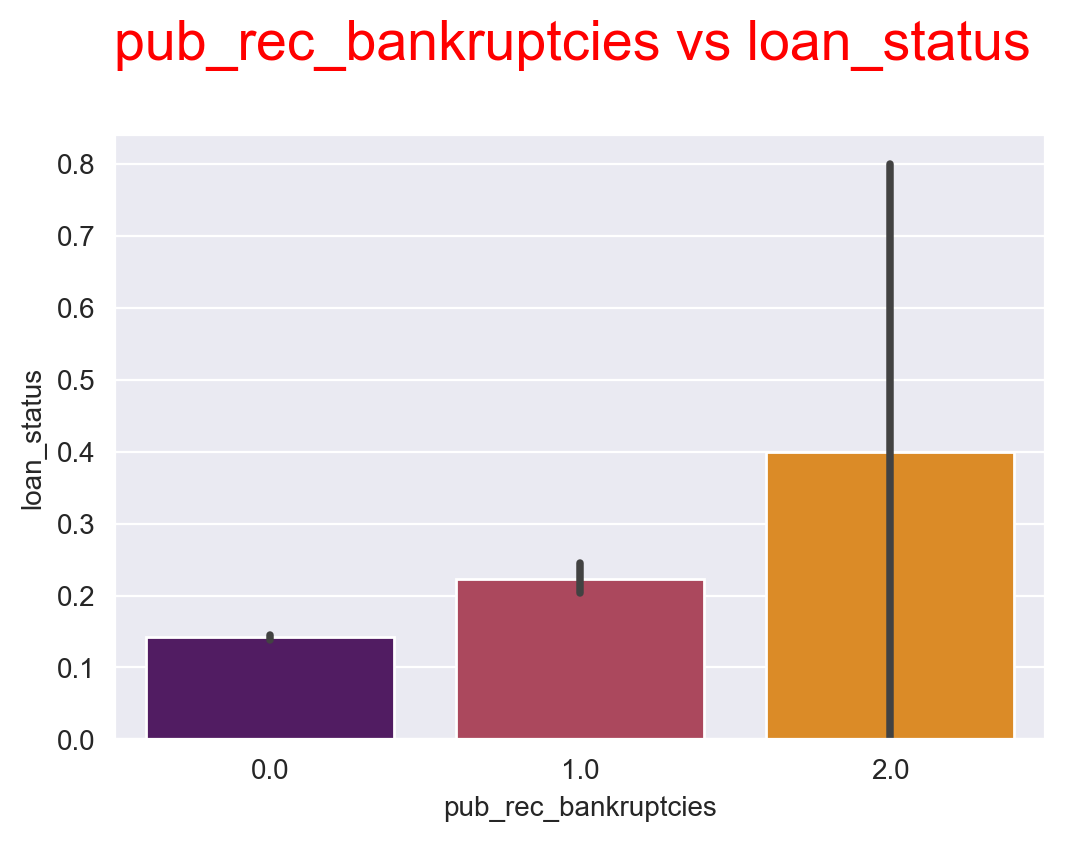

In [45]:
#here we are plotting number of public record bankruptcies vs loan_status
plt.figure(dpi=200)
plt.title('pub_rec_bankruptcies vs loan_status \n', fontdict={'fontsize':20,'color':'r'})
sns.barplot(x=df.pub_rec_bankruptcies,y=df.loan_status, palette='inferno')
plt.show()


From the above barplot we can clearly see that people having 2 public record bankruptcies are very highly likely to default followed by with just 1 record so on

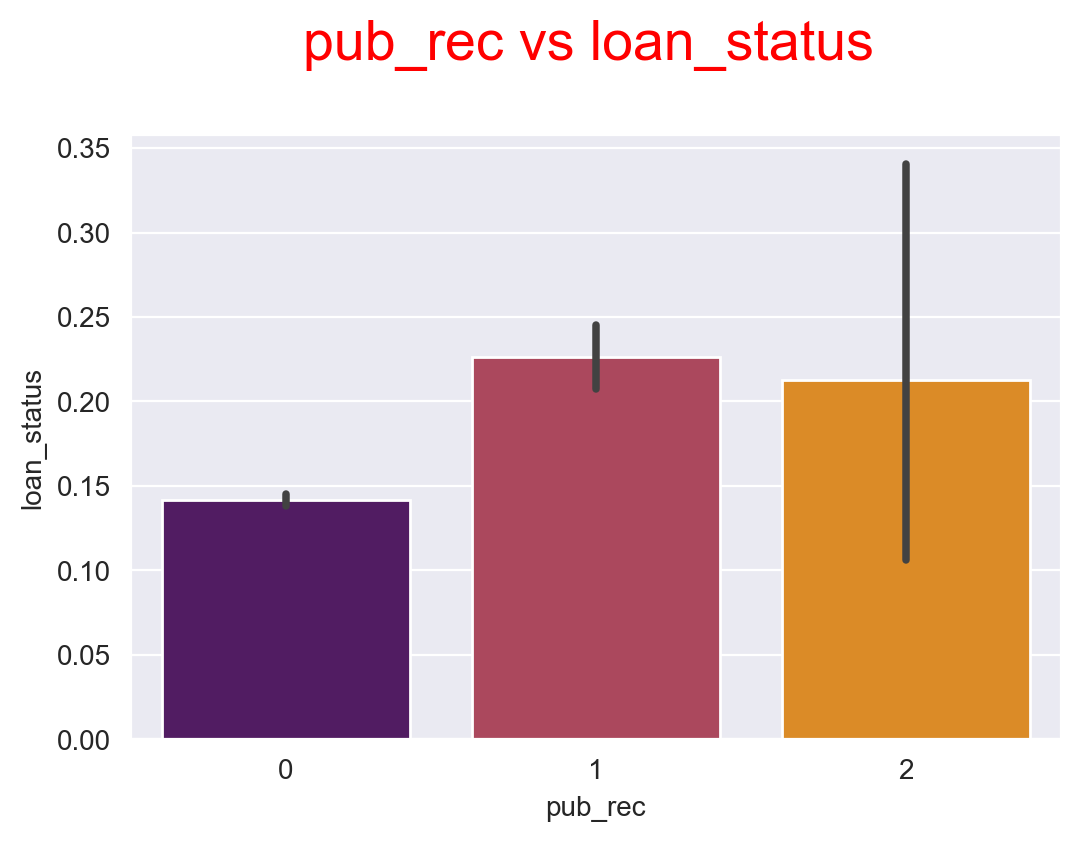

In [46]:
#here we are plotting boxplot for pub_rec and loan_status
plt.figure(dpi=200)
plt.title('pub_rec vs loan_status \n', fontdict={'fontsize':20,'color':'r'})
sns.barplot(x=df.pub_rec[df.pub_rec<3],y=df.loan_status, palette='inferno')
plt.show()

From the above barplot we can clearly see that people having any derogatory public record more likely to default

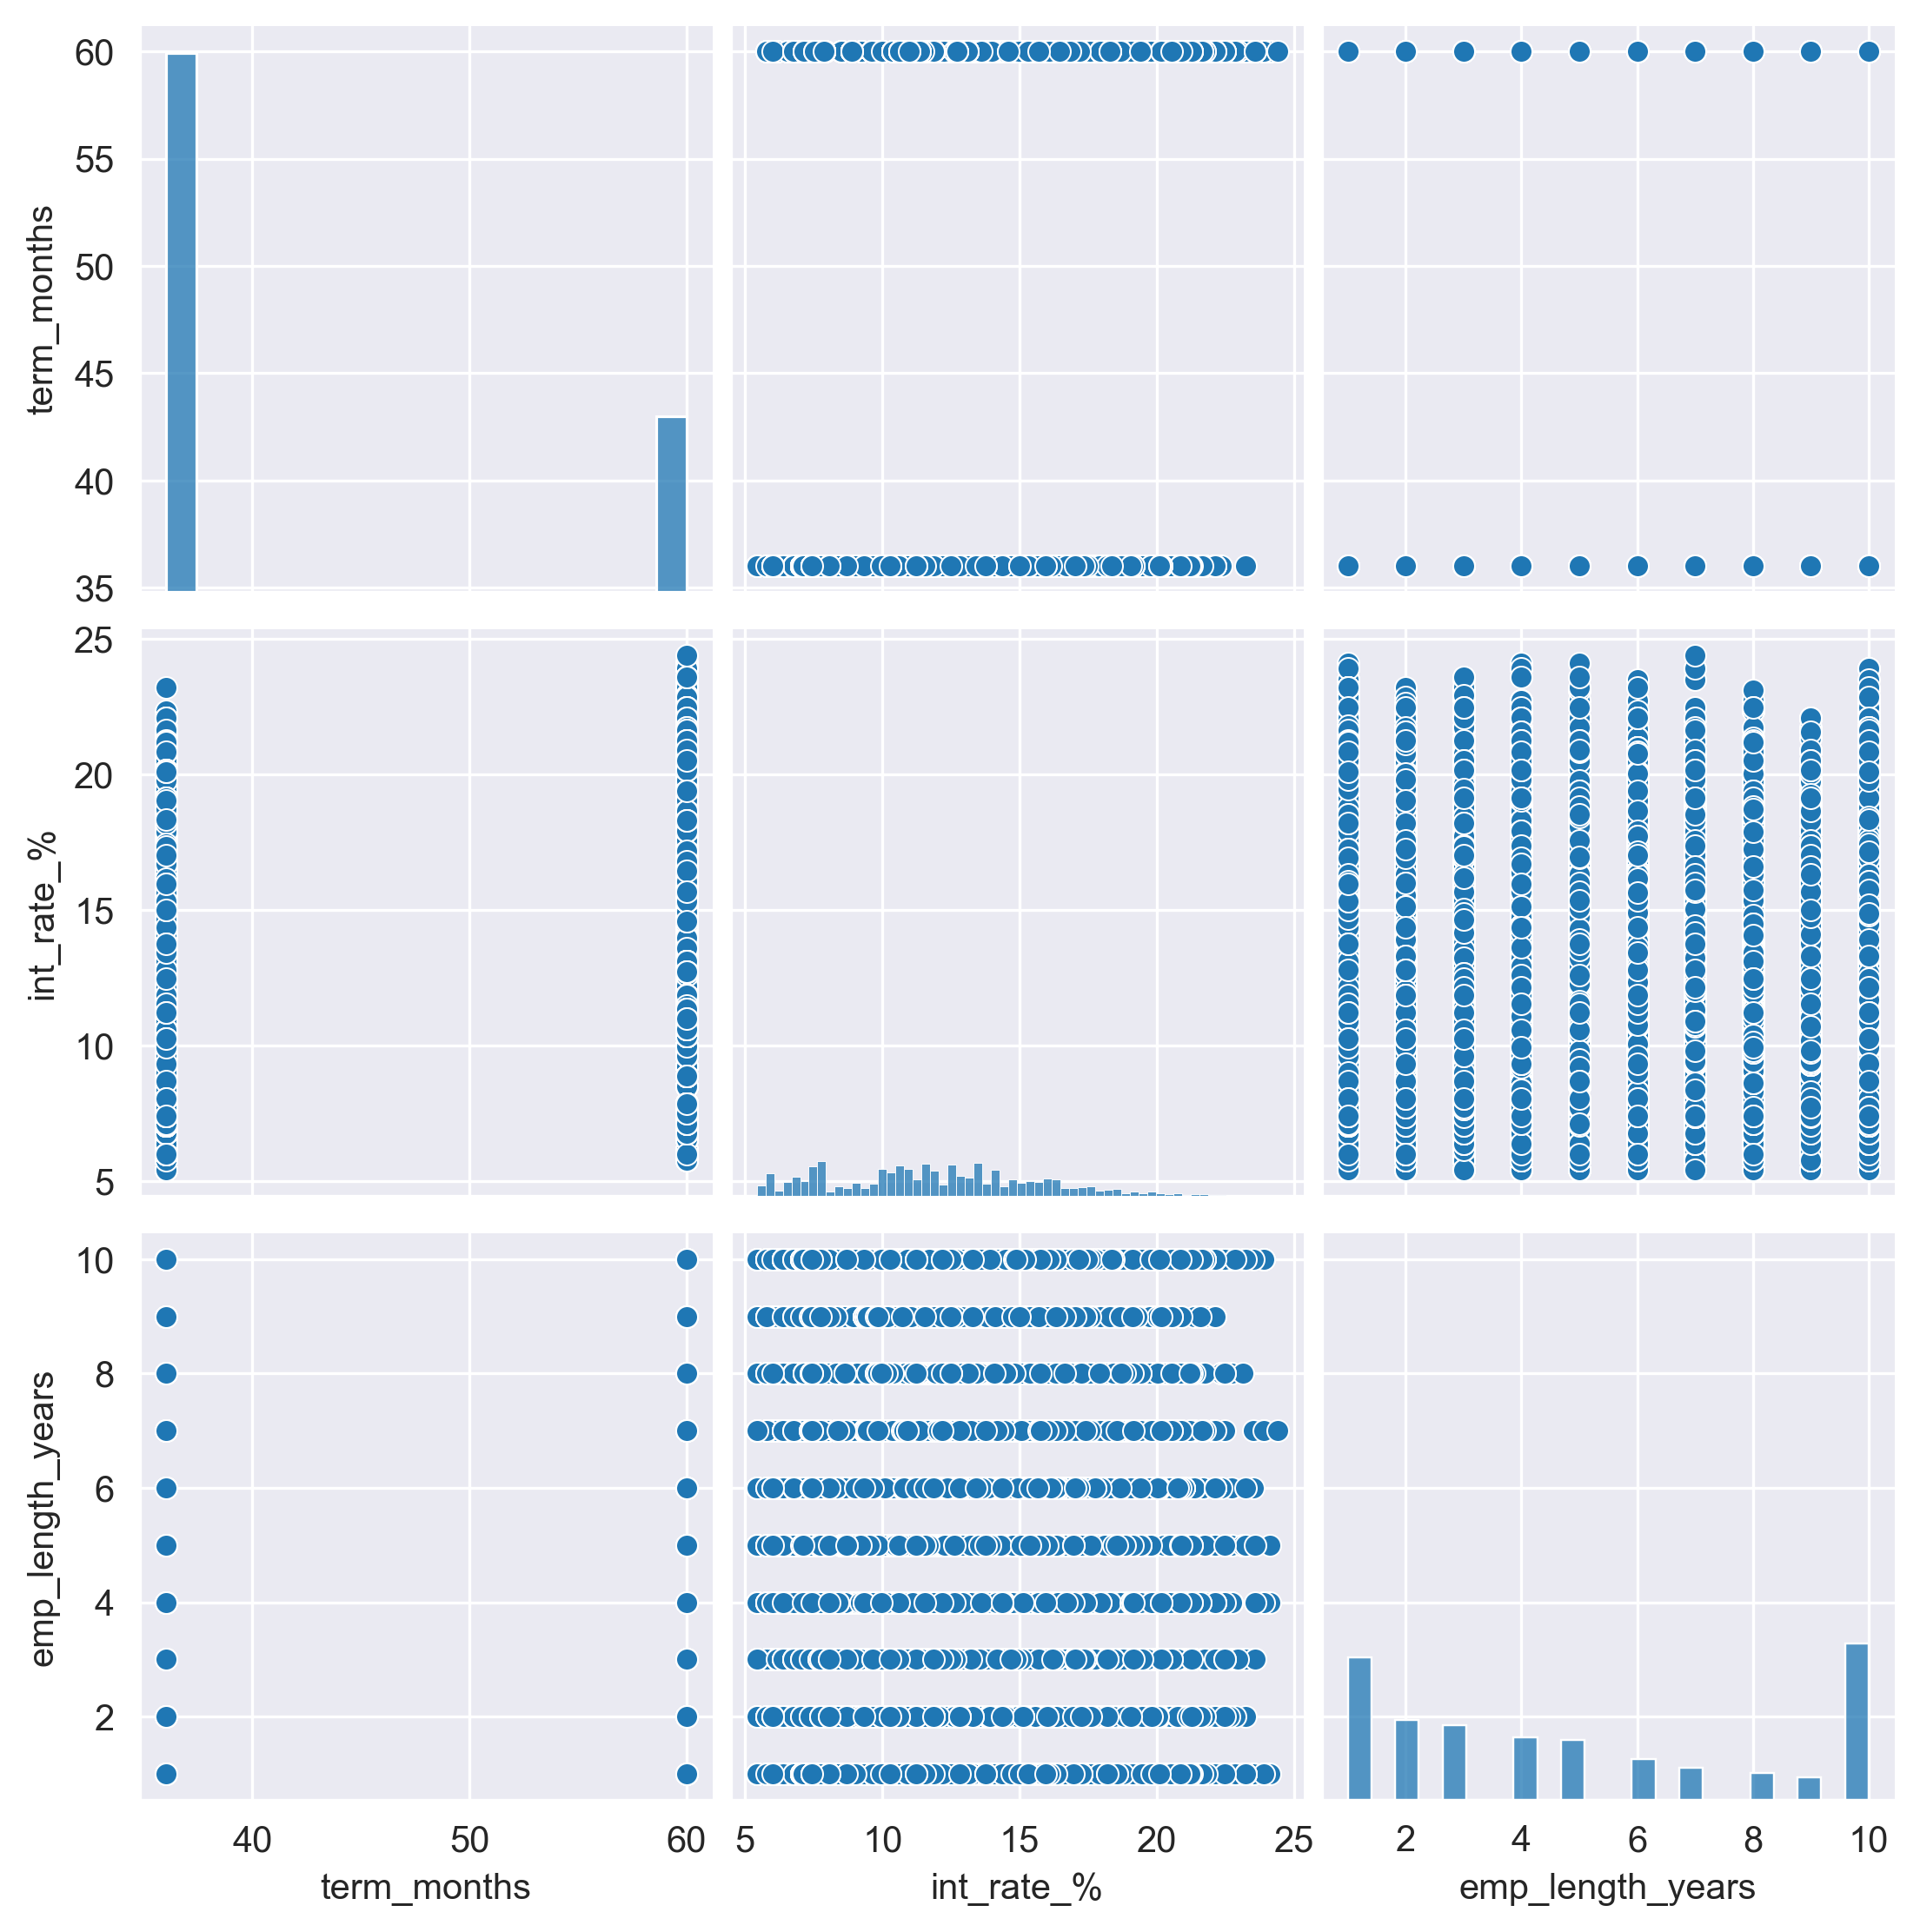

In [47]:
plt.rcParams['figure.dpi']=300
sns.pairplot(df[['term_months','int_rate_%','emp_length_years']])
plt.show();

In the above cell we produced pairplot for the three most important (based on domain knowledge) numeric variables such as term_months, int_rate_%, emp_length_years. We do not see any trend between the 3 variables and the values are all over the place.

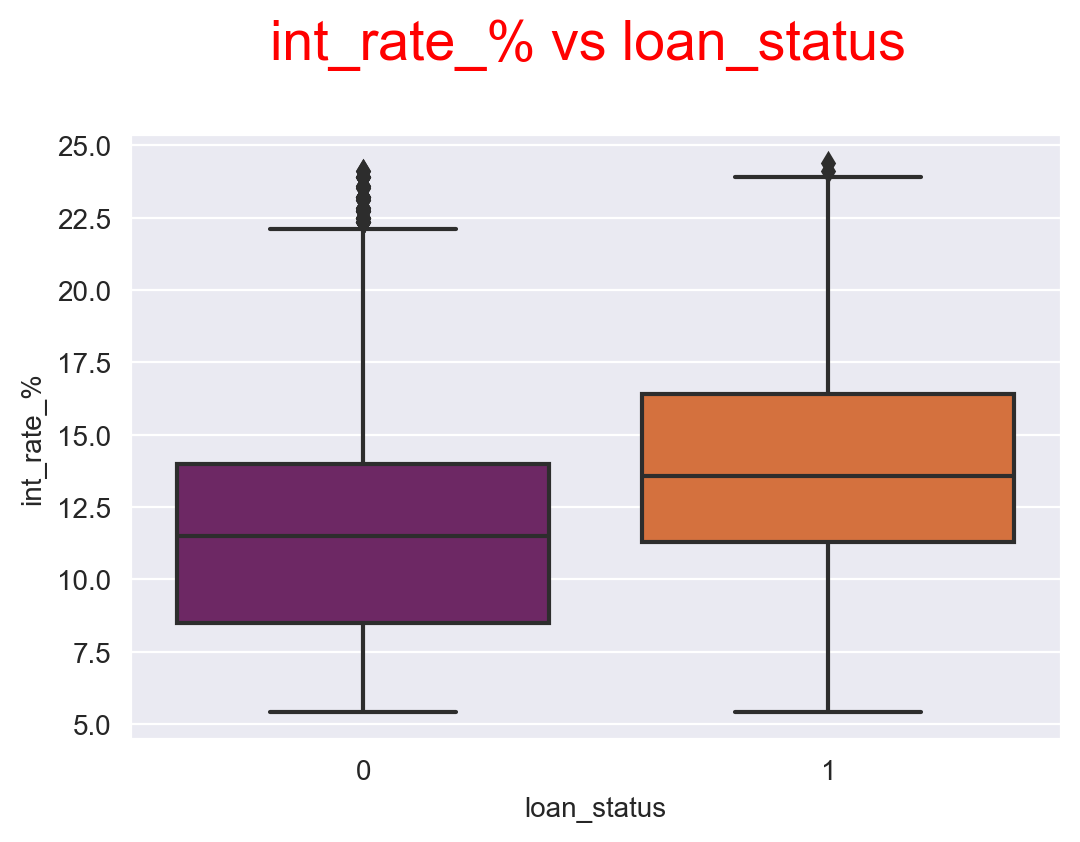

In [48]:
#here we are plotting boxplot for int_rate_% and loan_status
plt.figure(dpi=200)
plt.title('int_rate_% vs loan_status \n', fontdict={'fontsize':20,'color':'r'})
sns.boxplot(y=df['int_rate_%'],x=df.loan_status, palette='inferno')
plt.show()

In the above boxplot, we can see that even the 25th percentile of defaulters interest rate matches the median of non-defaulters. Hence we can infer that higher the interest rate, higher the chances of defaulting.

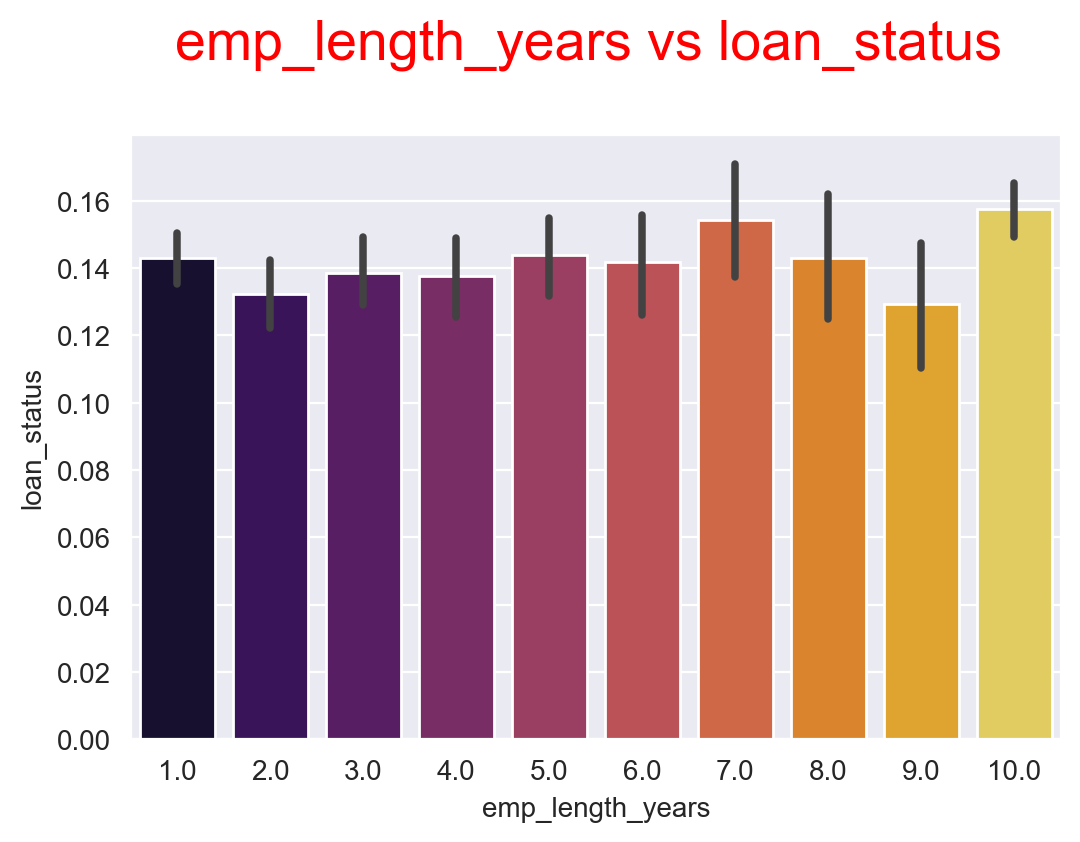

In [49]:
#here we are plotting barplot for emp_length_years and loan_status
plt.figure(dpi=200)
plt.title('emp_length_years vs loan_status \n', fontdict={'fontsize':20,'color':'r'})
sns.barplot(x=df.emp_length_years,y=df.loan_status, palette='inferno')
plt.show()

From the above barplot we can infer that the employment length has no straight-forward impact on likelihood of defaulting


<font size=10><font color='blue'><u>Conclusion</u></font>

<font size=6>The following are the variables that has considerable impact on the repayment of the loan</font>
* <font size=5> <font color='blue'>grade</font> → particularly starting from D has higher default rate </font>
* <font size=5> <font color='blue'>sub_grade</font> → particularly starting from D2 has higher default rate </font>
* <font size=5> <font color='blue'>int_rate</font> → higher the interest rate, higher the default rate </font>
* <font size=5> <font color='blue'>term</font> → people opting for 60 months has higher default rate </font>
* <font size=5> <font color='blue'>annual_inc</font> → people in lower income bracket have higher default rate</font>
* <font size=5> <font color='blue'>loan_amnt</font> → higher the loan amount, higher the default rate</font>
* <font size=5> <font color='blue'>purpose</font> → particularly small_business has higher default rate </font>
* <font size=5> <font color='blue'>pub_rec</font> → having derogatory public record significantly increases the chances of defaulting </font>
* <font size=5> <font color='blue'>pub_rec_bankruptcies</font> → having public record bankruptcies significantly increases the chances of defaulting </font>